In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import GraphHelpers as GH
import ETFunctions as et
import MathsUtilities as MUte
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami

In [2]:
RnLessG = pd.read_pickle('RnLessG.pkl')
fPAR = pd.read_pickle('fPAR.pkl')
Ta = pd.read_pickle('Ta.pkl')
Ed = pd.read_pickle('Ed.pkl')
Ts = pd.read_pickle('Ts.pkl')
WU = pd.read_pickle('WU.pkl')
# Drop the excess irrigation treatments from the oats because they have some drainage in them
RnLessG.loc[:,('Oats','Excess')]= np.nan
fPAR.loc[:,('Oats','Excess')]= np.nan
Ts.loc[:,('Oats','Excess')]= np.nan
WU.loc[:,('Oats','Excess')]= np.nan

C:\Anaconda\lib\site-packages\IPython\core\async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [3]:
#Create a list of time to exclude where data was missing or irrigation was applied
BarleyNoMeasurementDates = ['2014-12-26','2014-12-27','2014-12-28']
BarleyIrrigationDates = ['2014-11-11','2014-11-18','2014-11-26','2014-12-02','2014-12-10','2014-12-16',
                    '2014-12-23','2014-12-30','2015-01-06','2015-01-13','2015-01-14']
WheatIrrigationDates = ['2015-11-26', '2016-01-21', '2016-01-07', '2015-11-12',
                         '2015-12-24', '2015-11-19', '2015-12-17', '2016-02-04',
                         '2015-11-06', '2015-12-31', '2015-10-13', '2015-11-02',
                         '2016-01-14', '2015-10-29', '2015-12-03', '2015-10-30',
                         '2015-12-10', '2016-02-03']
FodderBeetIrrigationDates = ['2017-01-18',
                             '2017-03-08', '2017-03-01', '2017-05-30', '2017-01-25',
                             '2016-11-23', '2016-12-07', '2017-05-26', '2017-05-25',
                             '2017-02-01', '2017-02-08', '2017-03-22', '2017-02-22',
                             '2016-12-29', '2017-04-27', '2017-01-04', '2016-11-16',
                             '2017-04-12', '2017-02-15', '2017-05-29', '2017-01-11',
                             '2016-12-21']
OatsIrrigationDates = ['2017-12-06', '2017-12-13', '2017-09-13', '2017-11-22',
                        '2017-10-11', '2017-09-12', '2017-09-11', '2017-10-10',
                        '2017-10-12', '2017-08-28', '2017-11-06', '2017-11-29',
                        '2017-11-15']
LandPExclusionDates = ['2013-05-08', '2013-06-26']
ExclusionDates = pd.to_datetime(BarleyIrrigationDates + \
                 WheatIrrigationDates + \
                 FodderBeetIrrigationDates + \
                 OatsIrrigationDates + \
                 BarleyNoMeasurementDates + \
                 LandPExclusionDates)

WUUseDates = [x not in ExclusionDates for x in WU.index]
WU = WU.loc[WUUseDates,:]

In [4]:
CommonDates = []
with open('CommonDates.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        CommonDates.append(currentPlace)
CommonDates = pd.to_datetime(CommonDates)

In [5]:
Crops = Ts.columns.get_level_values(0).drop_duplicates().values
Crops.sort()
WheatGPs = GH.SetGraphicsPatterns(Ts.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

FodderBeetGPs = GH.SetGraphicsPatterns(Ts.FodderBeet.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

LucerneGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

RyegrassGPs = GH.SetGraphicsPatterns(Ts.loc[:,['Lucerne','Ryegrass']].columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['red','blue','green','orange'],InvertLevels=True)

OatsGPs = GH.SetGraphicsPatterns(Ts.Oats.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['purple','green','orange'])
BarleyGPs = GH.SetGraphicsPatterns(Ts.Barley.columns,
                    ['--','-'],
                    [0.45,0.15],
                    ['^','o'],
                    ['blue','red'])

Irrigation
['Irrigated', 'Dryland']
Nitrogen
['50', '250', '0']
Treatments
MultiIndex([('Irrigated',  '50'),
            ('Irrigated', '250'),
            ('Irrigated',   '0'),
            (  'Dryland',  '50'),
            (  'Dryland', '250'),
            (  'Dryland',   '0')],
           )
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Irrigated 50    -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          0     -  purple  0.15   o  purple
Dryland   50   --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          0    --  purple  0.45   ^   white
Irrigation
['Irrigated', 'Dryland']
Nitrogen
['50', '0', '300']
Treatments
MultiIndex([('Irrigated',  '50'),
            ('Irrigated',   '0'),
            ('Irrigated', '300'),
            (  'Dryland',  '50'),


## Function to calculate WU for each crop for a given set of Parameters

In [6]:
def CoverFactor(fPAR,s):
    CoverFact = 0.1+s*fPAR
    if CoverFact > 1.0:
        CoverFact = 1.0
    return CoverFact

#Calculate alpha
def AlphaCoeff(Td,fPAR,p,q,s):
    Td = max(Td,-2.5)
    CoverFact = CoverFactor(fPAR,s)
    return p * np.exp(Td*-q) * CoverFact

def CalcE(p,q,m,s):    
    Td = pd.DataFrame(index = CommonDates,columns=Ts.columns)
    for plot in Td.columns:
        Td.loc[:,plot] = (Ts.loc[CommonDates,plot] \
        + Ed.loc[CommonDates,('Expt','Expt','Expt')].values \
        * m )\
        - Ta.loc[CommonDates,('Expt','Expt','Expt')].values       

    Alpha = pd.DataFrame(index = CommonDates,columns=Ts.columns)
    for plot in Alpha.columns:
        Alpha.loc[:,plot] = [AlphaCoeff(Td.loc[x,plot],
                                       fPAR.loc[x,plot],p,q,s) for x in Alpha.index]

    #Estimate Water Use by surfaces 
    E = pd.DataFrame(index = CommonDates,columns=Ts.columns)
    for plot in E.columns:
        E.loc[:,plot] = [et.Priestly_TaylorEO(RnLessG.loc[x,plot],
                                             Ta.loc[x,('Expt','Expt','Expt')],
                                             Alpha.loc[x,plot],
                                             'net') for x in E.index]
    return E

In [7]:
def CalcFits(p,q,m,s,E,Results):
    MeanPeriodE = WU.copy()
    MeanPeriodE.loc[:,:] = np.nan
    GH.SortFrame(MeanPeriodE)
    MeanE = E.groupby(level = ['Crop','Irrigation','Nitrogen'],axis=1).mean()
    GH.SortFrame(MeanE)
    for c in Crops:
        F1 = WU.loc[:,c].columns.get_level_values(0).name
        F2 = WU.loc[:,c].columns.get_level_values(1).name
        MeanWU = WU.loc[:,c].groupby(level=[F1,F2],axis=1).mean()
        Dates = MeanWU.dropna(how='all').index
        MeanPeriodE = MeanWU.copy()
        MeanPeriodE.loc[:,:] = np.nan
        GH.SortFrame(MeanPeriodE)
        for d in range(1,len(Dates)):
            for plot in MeanPeriodE.columns:
                MeanPeriodE.loc[Dates[d],plot] = MeanE.loc[Dates[d-1]+datetime.timedelta(days=1):Dates[d],(c,plot[0],plot[1])].mean()        
        Y = MeanPeriodE.iloc[1:,:].stack().stack()
        X = -1 * MeanWU.stack().stack().reindex(Y.index)
        RegStats = MUte.MathUtilities.CalcRegressionStats('ET',Y,X)
        Results.loc[(c,p,q,m,s),'NSE'] = RegStats.NSE
        Results.loc[(c,p,q,m,s),'R2'] = RegStats.R2
        Results.loc[(c,p,q,m,s),'RMSE'] = RegStats.RMSE
        Results.loc[(c,p,q,m,s),'ME'] = RegStats.ME

In [8]:
Base = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s']))
BaseE = CalcE(1.3,0.13,1.0,1.6)
CalcFits(1.3,0.13,1.0,1.6,BaseE,Base)

In [9]:
Base

,,,,,NSE,R2,RMSE,ME
Crop,p,q,m,s,,,,
Barley,1.3,0.13,1.0,1.6,0.822646,0.884565,1.243178,-0.587432
FodderBeet,1.3,0.13,1.0,1.6,0.766456,0.767405,0.760876,0.043604
Lucerne,1.3,0.13,1.0,1.6,0.486074,0.689790,0.972948,0.470658
Oats,1.3,0.13,1.0,1.6,0.613660,0.734938,1.286899,0.649271
Ryegrass,1.3,0.13,1.0,1.6,0.486015,0.592023,0.878396,0.349079
Wheat,1.3,0.13,1.0,1.6,0.761216,0.805838,0.766012,0.070997


In [10]:
def ObsPredPlot(PredE):
    pos =  1
    for crop in Crops:
            ax = Graph.add_subplot(2,3,pos)
            F1 = WU.loc[:,crop].columns.get_level_values(0).name
            F2 = WU.loc[:,crop].columns.get_level_values(1).name
            MeanWU = WU.loc[:,crop].groupby(level=[F1,F2],axis=1).mean()
            MeanE = PredE.loc[:,crop].groupby(level=[F1,F2],axis=1).mean()
            Dates = MeanWU.dropna(how='all').index
            MeanPeriodE = MeanWU.copy()
            MeanPeriodE.loc[:,:] = np.nan
            GH.SortFrame(MeanPeriodE)
            for d in range(1,len(Dates)):
                for plot in MeanPeriodE.columns:
                    MeanPeriodE.loc[Dates[d],plot] = MeanE.loc[Dates[d-1]+datetime.timedelta(days=1):Dates[d],(plot[0],plot[1])].mean()        
            X = MeanPeriodE.iloc[1:,:]
            Y = -1 * MeanWU.reindex(X.index)
            GH.AddIndexedXY(X,Y,
                            ax,globals()[crop+'GPs'], 10)
            GH.SetAxProps(crop,25,'$ET_{SW}$, (mm/d)','$ET_{MPT}$ (mm/d)',26,25)
            GH.AddLegend(2,16,"")
            X = MeanPeriodE.iloc[1:,:].stack().stack()
            Y = -1 * MeanWU.stack().stack().reindex(X.index)

            RegStats = MUte.MathUtilities.CalcRegressionStats('ET',X,Y)
            Xs = []
            Xs.append(X.min())
            Xs.append(X.max())
            Ys = []
            Ys.append(RegStats.Intercept + Xs[0]*RegStats.Slope)
            Ys.append(RegStats.Intercept + Xs[1]*RegStats.Slope)
            plt.plot([0,13],[0,13],'-', linewidth = 3, color='k')
            fitR2 = r'$R^2$ = ' + str(RegStats.R2)[:4]\
                + '\n$Bias$ = ' + str(RegStats.ME)[:4] + ' mm' \
                + '\n$RMSE$ = ' + str(RegStats.RMSE)[:4] + ' mm'\
                + '\n$NSE$ = ' + str(RegStats.NSE)[:4] +''
            plt.text(.5,.05,fitR2,fontsize=16,transform=ax.transAxes)

            pos +=1
    plt.tight_layout() 

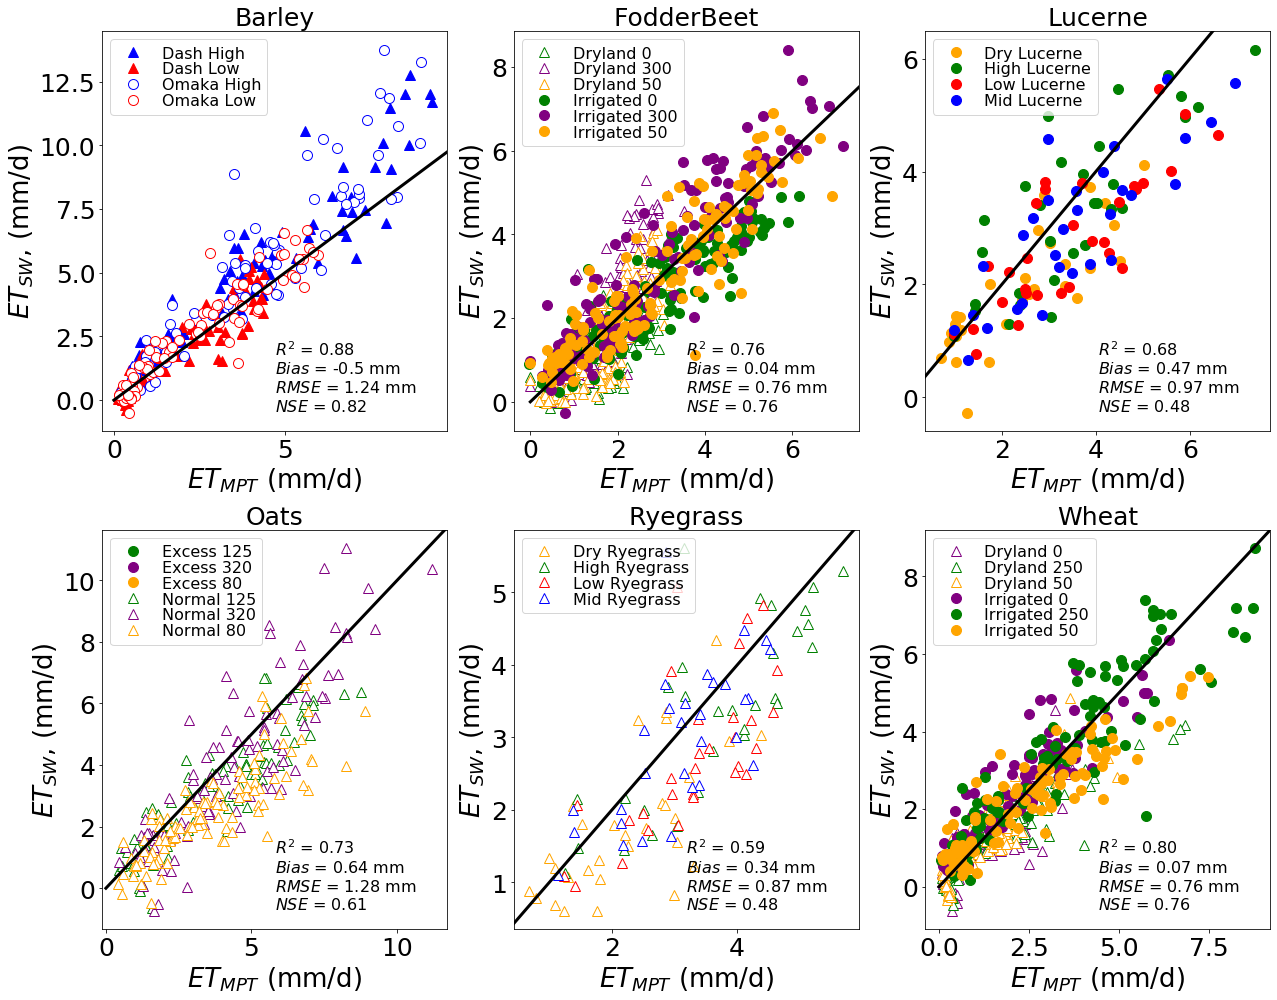

In [11]:
Graph = plt.figure(figsize=(18,14))
ObsPredPlot(BaseE)

In [12]:
OptFits = pd.read_pickle('next.pkl')

In [13]:
OptFits

,,,,,NSE,R2,RMSE,ME,Crop,p,q,m,s
Crop,p,q,m,s,,,,,,,,,
Barley,0.985645,0.082568,1.796387,2.321191,0.538536,0.805687,2.005311,-1.128328,Barley,0.985645,0.082568,1.796387,2.321191
FodderBeet,0.985645,0.082568,1.796387,2.321191,0.671382,0.724266,0.902558,-0.258892,FodderBeet,0.985645,0.082568,1.796387,2.321191
Lucerne,0.985645,0.082568,1.796387,2.321191,0.627854,0.663732,0.827934,-0.223275,Lucerne,0.985645,0.082568,1.796387,2.321191
Oats,0.985645,0.082568,1.796387,2.321191,0.645347,0.678258,1.232995,-0.216545,Oats,0.985645,0.082568,1.796387,2.321191
Ryegrass,0.985645,0.082568,1.796387,2.321191,0.490132,0.524308,0.874871,-0.218091,Ryegrass,0.985645,0.082568,1.796387,2.321191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
FodderBeet,1.261768,0.131001,2.666748,2.921045,0.625176,0.696898,0.963925,-0.305306,FodderBeet,1.261768,0.131001,2.666748,2.921045
Lucerne,1.261768,0.131001,2.666748,2.921045,0.664610,0.667471,0.785985,-0.064686,Lucerne,1.261768,0.131001,2.666748,2.921045
Oats,1.261768,0.131001,2.666748,2.921045,0.634013,0.647799,1.252542,0.106160,Oats,1.261768,0.131001,2.666748,2.921045


In [14]:
Ranks = pd.DataFrame(index = OptFits.loc['Barley',:].index)
for c in Crops:
    cRanks = pd.DataFrame(index = OptFits.loc[c,'NSE'].sort_values(ascending=False).index)
    cRanks.loc[:,'Rank'] = range(cRanks.index.size)
    Ranks.loc[:,c] = cRanks.loc[:,'Rank']
Ranks.loc[:,'Mean'] = Ranks.mean(axis=1)
Ranks.loc[:,'Max'] = Ranks.max(axis=1)
BestComb = Ranks.loc[:,'Max'].sort_values().index[0]
print(BestComb)
Best = list(Ranks.loc[:,'Mean'].sort_values().index[0])
print(Best)
Ranks = Ranks.sort_values('Mean')

(1.31064453125, 0.15543945312500002, 1.17138671875, 1.7961914062500002)
[1.14814453125, 0.131318359375, 0.85888671875, 1.53369140625]


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2854: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [15]:
Ranks

Barley  FodderBeet  Lucerne  Oats  \
p        q        m        s                                             
1.148145 0.131318 0.858887 1.533691     134           9       23     9   
1.104980 0.110752 1.093262 1.935645     157          11        3    11   
                  1.161621 1.935645     164          14        1    12   
1.188770 0.151631 1.161621 2.518066     143          38       25    10   
                  1.093262 2.518066     137          34       31    13   
...                                     ...         ...      ...   ...   
1.876855 0.074189 1.483887 2.526270     210         295      292   293   
1.836230 0.070127 1.005371 2.066895     212         296      293   292   
1.911768 0.070190 1.416748 1.871045     217         297      297   295   
1.836230 0.070127 1.005371 2.386816     221         298      298   294   
1.876855 0.074189 0.927246 2.526270     229         299      299   299   

                                     Ryegrass  Wheat        Mean    Max  
p        q        m        s                                             
1.148145 0.131318 0.858887 1.533691         5     28   34.666667  134.0  
1.104980 0.110752 1.093262 1.935645        14     14   35.000000  157.0  
                  1.161621 1.935645        13     10   35.666667  164.0  
1.188770 0.151631 1.161621 2.518066         9      1   37.666667  143.0  
                  1.093262 2.518066         8      5   38.000000  137.0  
...                                       ...    ...         ...    ...  
1.876855 0.074189 1.483887 2.526270       295    297  280.333333  297.0  
1.836230 0.070127 1.005371 2.066895       296    296  280.833333  296.0  
1.911768 0.070190 1.416748 1.871045       298    295  283.166667  298.0  
1.836230 0.070127 1.005371 2.386816       297    298  284.333333  298.0  
1.876855 0.074189 0.927246 2.526270       299    299  287.333333  299.0  

[300 rows x 8 columns]

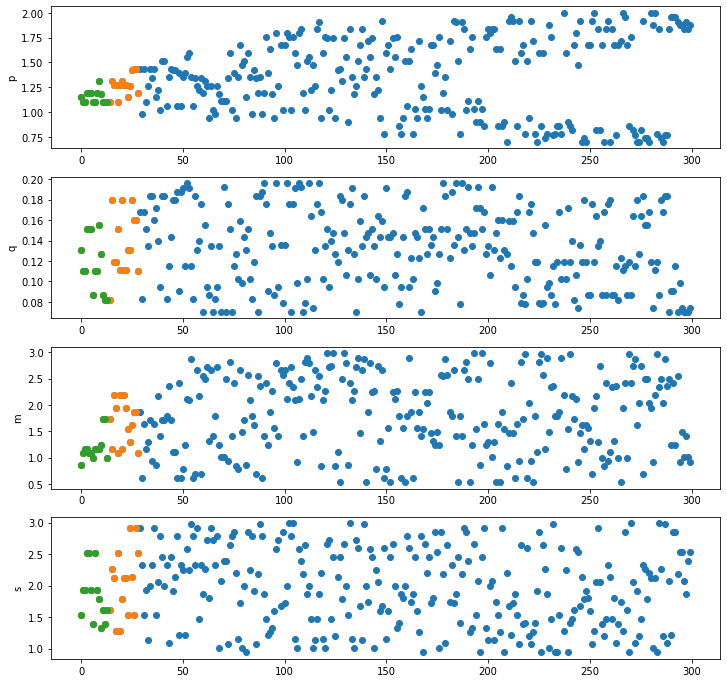

In [19]:
Graph = plt.figure(figsize=(12,12))
pos=1
for par in ['p','q','m','s']:
    ax = Graph.add_subplot(4,1,pos)
    plt.plot(range(Ranks.index.size),Ranks.index.get_level_values(par),'o')
    plt.plot(range(Ranks.index.size)[0:29],Ranks.index.get_level_values(par)[0:29],'o')
    plt.plot(range(Ranks.index.size)[0:14],Ranks.index.get_level_values(par)[0:14],'o')
    plt.ylabel(par)
    pos+=1
Graph.savefig('C:\\Users\\cflhxb\\Desktop\\MPT method test paper\\Figure6.eps',dpi=400)

### Lets look at selecting a param combination with m close to 2 to better match the report by Alves

In [20]:
TenthPercentile = Ranks.iloc[0:29,:]
Selections = TenthPercentile.loc[TenthPercentile.index.get_level_values('m')>1.9,:]


In [21]:
Selections

Barley  FodderBeet  Lucerne  Oats  \
p       q        m        s                                             
1.27002 0.118877 2.187012 2.124316     166          44       12    43   
                 1.942871 1.279395     165          40       24    36   
        0.111006 2.187012 1.279395     168          41       19    50   
                          2.124316     160          35       20    54   
                 1.942871 2.124316     145          21       32    55   

                                    Ryegrass  Wheat       Mean    Max  
p       q        m        s                                            
1.27002 0.118877 2.187012 2.124316        18     15  49.666667  166.0  
                 1.942871 1.279395         3     32  50.000000  165.0  
        0.111006 2.187012 1.279395         4     29  51.833333  168.0  
                          2.124316        31     34  55.666667  160.0  
                 1.942871 2.124316        40     46  56.500000  145.0

In [22]:
TenthPercentile

Barley  FodderBeet  Lucerne  Oats  \
p        q        m        s                                             
1.148145 0.131318 0.858887 1.533691     134           9       23     9   
1.104980 0.110752 1.093262 1.935645     157          11        3    11   
                  1.161621 1.935645     164          14        1    12   
1.188770 0.151631 1.161621 2.518066     143          38       25    10   
                  1.093262 2.518066     137          34       31    13   
                           1.935645     141          37       28     8   
1.099268 0.086440 0.994385 1.397314     156           0        5    20   
1.104980 0.110752 1.161621 2.518066     161          16        8    17   
1.188770 0.110752 1.161621 1.935645     125           3       36    25   
1.310645 0.155439 1.171387 1.796191      74          12       86    51   
1.186230 0.127256 1.249512 1.336816     152          31       22    16   
1.099268 0.086440 1.729248 1.608545     183          22        0    27   
         0.082251 1.729248 1.397314     187          17        4    31   
                  0.994385 1.608545     151           2       11    22   
                  1.729248 1.608545     181          18        2    28   
1.310645 0.180068 1.171387 2.263770      94          50       87    30   
1.270020 0.118877 2.187012 2.124316     166          44       12    43   
                  1.942871 1.279395     165          40       24    36   
1.104980 0.151631 1.093262 2.518066     167          80        9     7   
1.270020 0.111006 2.187012 1.279395     168          41       19    50   
1.310645 0.180068 1.171387 1.796191     103          57       85    23   
1.270020 0.111006 2.187012 2.124316     160          35       20    54   
                  1.942871 2.124316     145          21       32    55   
1.148145 0.131318 1.552246 1.533691     184          78        6    14   
1.261768 0.131001 1.306885 2.921045     105           7       69    63   
1.424268 0.179751 1.619385 2.133545     106          66       93    57   
1.432520 0.159756 1.874512 1.541895     131          62       76    59   
                           2.911816     112          42       81    89   
1.188770 0.110752 1.093262 2.518066     113           6       61    44   

                                     Ryegrass  Wheat       Mean    Max  
p        q        m        s                                            
1.148145 0.131318 0.858887 1.533691         5     28  34.666667  134.0  
1.104980 0.110752 1.093262 1.935645        14     14  35.000000  157.0  
                  1.161621 1.935645        13     10  35.666667  164.0  
1.188770 0.151631 1.161621 2.518066         9      1  37.666667  143.0  
                  1.093262 2.518066         8      5  38.000000  137.0  
                           1.935645         6     13  38.833333  141.0  
1.099268 0.086440 0.994385 1.397314        26     30  39.500000  156.0  
1.104980 0.110752 1.161621 2.518066        27     33  43.666667  161.0  
1.188770 0.110752 1.161621 1.935645        37     38  44.000000  125.0  
1.310645 0.155439 1.171387 1.796191        24     17  44.000000   86.0  
1.186230 0.127256 1.249512 1.336816         2     43  44.333333  152.0  
1.099268 0.086440 1.729248 1.608545        25     21  46.333333  183.0  
         0.082251 1.729248 1.397314        15     26  46.666667  187.0  
                  0.994385 1.608545        48     50  47.333333  151.0  
                  1.729248 1.608545        29     31  48.166667  181.0  
1.310645 0.180068 1.171387 2.263770        12     22  49.166667   94.0  
1.270020 0.118877 2.187012 2.124316        18     15  49.666667  166.0  
                  1.942871 1.279395         3     32  50.000000  165.0  
1.104980 0.151631 1.093262 2.518066        30     16  51.500000  167.0  
1.270020 0.111006 2.187012 1.279395         4     29  51.833333  168.0  
1.310645 0.180068 1.171387 1.796191        11     44  53.833333  103.0  
1.270020 0.111006 2.187012 2.124316        31     34  55.666667

Lets chose the third set (index pos = 2) as it allows a value of m > 2 and a lower s

In [23]:
list(Selections.index[2])

[1.27001953125, 0.11100585937500002, 2.18701171875, 1.27939453125]

In [24]:
Selected = list(Selections.index[2])
SelectedDF = pd.DataFrame(index=['p','q','m','s'],data=Selected)

### Now we have three was of selecting param sets:
- The values fitted to the barley
- The values that give the best overall statistics
- The values that allow a s ~ 2 to better reconcile with Alves

Graph these agianst the rest of the fitting space to see how they look

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth m

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.
  if sys.path[0] == '':


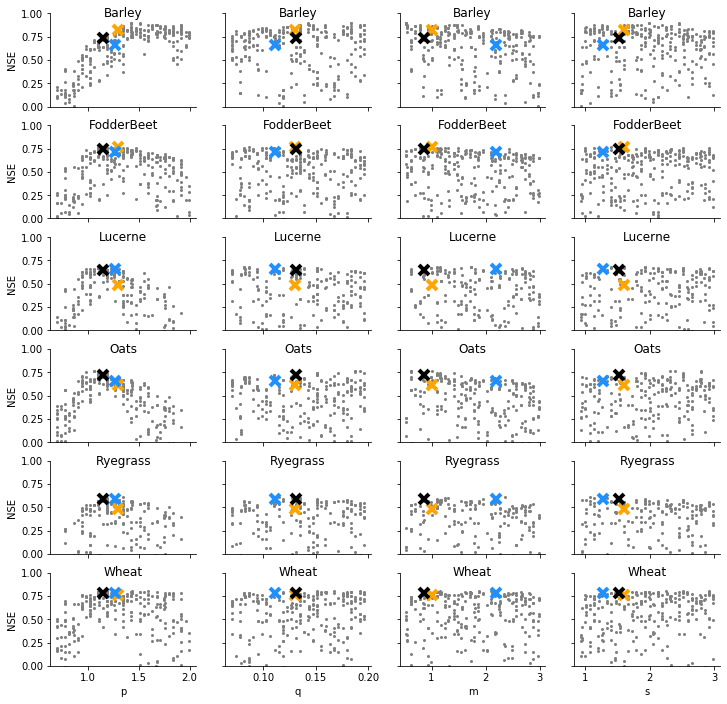

In [27]:
Graph = plt.figure(figsize=(12,12))
cols = ['yellow','blue','darkgreen','red','lightgreen','orange']
pos=1
for c in Crops:
    colpos = 0
    for par in ['p','q','m','s']:
        ax = Graph.add_subplot(6,4,pos)
        plt.plot(OptFits.loc[c,par],OptFits.loc[c,'NSE'],'o',ms=2,color='grey')
        plt.plot(Base.index.get_level_values(par).drop_duplicates(),Base.loc[c,'NSE'],'x',color='orange',markersize=10,mew=4)
        plt.plot(Ranks.loc[:,'Mean'].index.get_level_values(par)[0],
            OptFits.loc[(c,Best[0]),:].loc[Best[1],:].loc[Best[2],:].loc[Best[3],:].NSE,'x',color='k',markersize=10,mew=4)
        plt.plot(SelectedDF.loc[par],OptFits.loc[c,'NSE'].loc[Selected[0]].loc[Selected[1]].loc[Selected[2]].loc[Selected[3]],'x',color='dodgerblue',markersize=10,mew=4)
        plt.title(c,y=0.9)
        plt.ylim(0,1)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=False,labelsize=10)
        plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=False,labelsize=10)
        if pos in [1,5,9,13,17,21]:
            plt.ylabel('NSE')
            plt.tick_params(axis='y', which='both', left=True,right=False, labelleft=True,labelsize=10)
        if pos in range(21,25):
            plt.xlabel(par)
            plt.tick_params(axis='x', which='both', bottom=True,top=False, labelbottom=True,labelsize=10)
        pos+=1
        colpos+=1

Graph.savefig('C:\\Users\\cflhxb\\Desktop\MPT method test paper\Figure5.eps',dpi=400)

In [28]:
Select = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s']))
SelectE = CalcE(Selected[0],Selected[1],Selected[2],Selected[3])
CalcFits(Selected[0],Selected[1],Selected[2],Selected[3],SelectE,Select)

In [29]:
Select

,,,,,NSE,R2,RMSE,ME
Crop,p,q,m,s,,,,
Barley,1.27002,0.111006,2.187012,1.279395,0.664989,0.833376,1.708606,-0.978322
FodderBeet,1.27002,0.111006,2.187012,1.279395,0.711702,0.740706,0.845377,-0.214923
Lucerne,1.27002,0.111006,2.187012,1.279395,0.656350,0.674666,0.795605,0.049660
Oats,1.27002,0.111006,2.187012,1.279395,0.658746,0.666769,1.209479,0.168153
Ryegrass,1.27002,0.111006,2.187012,1.279395,0.592509,0.594731,0.782121,0.005950
Wheat,1.27002,0.111006,2.187012,1.279395,0.779614,0.801709,0.735911,-0.229771


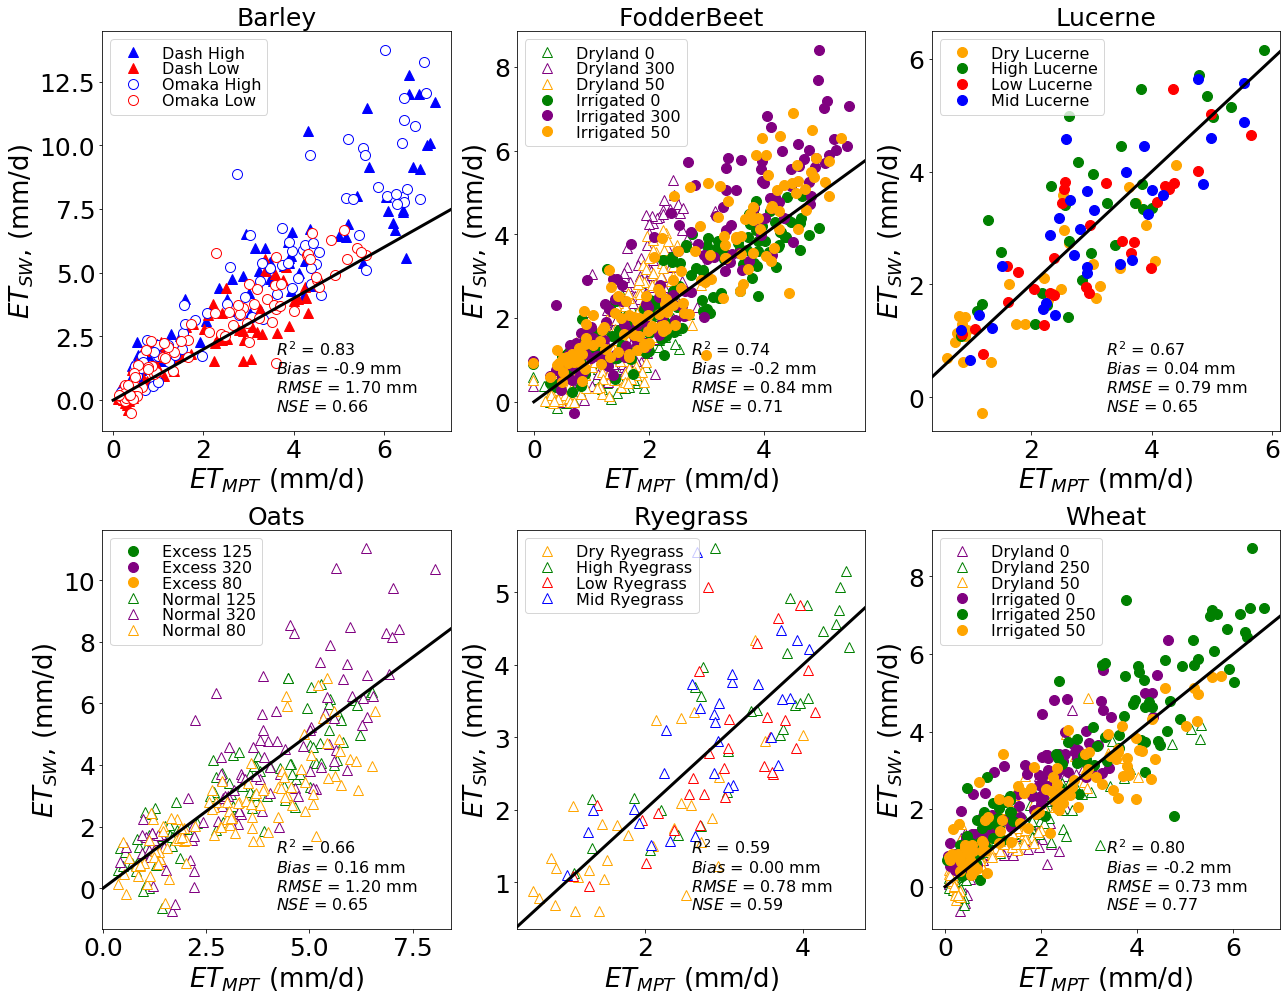

In [30]:
Graph = plt.figure(figsize=(18,14))
ObsPredPlot(SelectE)

In [31]:
Bestt = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s']))
BestE = CalcE(Best[0],Best[1],Best[2],Best[3])
CalcFits(Best[0],Best[1],Best[2],Best[3],BestE,Bestt)

In [32]:
Bestt

,,,,,NSE,R2,RMSE,ME
Crop,p,q,m,s,,,,
Barley,1.148145,0.131318,0.858887,1.533691,0.740112,0.888332,1.504895,-0.918593
FodderBeet,1.148145,0.131318,0.858887,1.533691,0.746034,0.769691,0.793447,-0.213090
Lucerne,1.148145,0.131318,0.858887,1.533691,0.648275,0.689518,0.804897,0.119262
Oats,1.148145,0.131318,0.858887,1.533691,0.722372,0.738228,1.090915,0.231451
Ryegrass,1.148145,0.131318,0.858887,1.533691,0.590069,0.594848,0.784459,0.014902
Wheat,1.148145,0.131318,0.858887,1.533691,0.780099,0.802253,0.735100,-0.173541


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

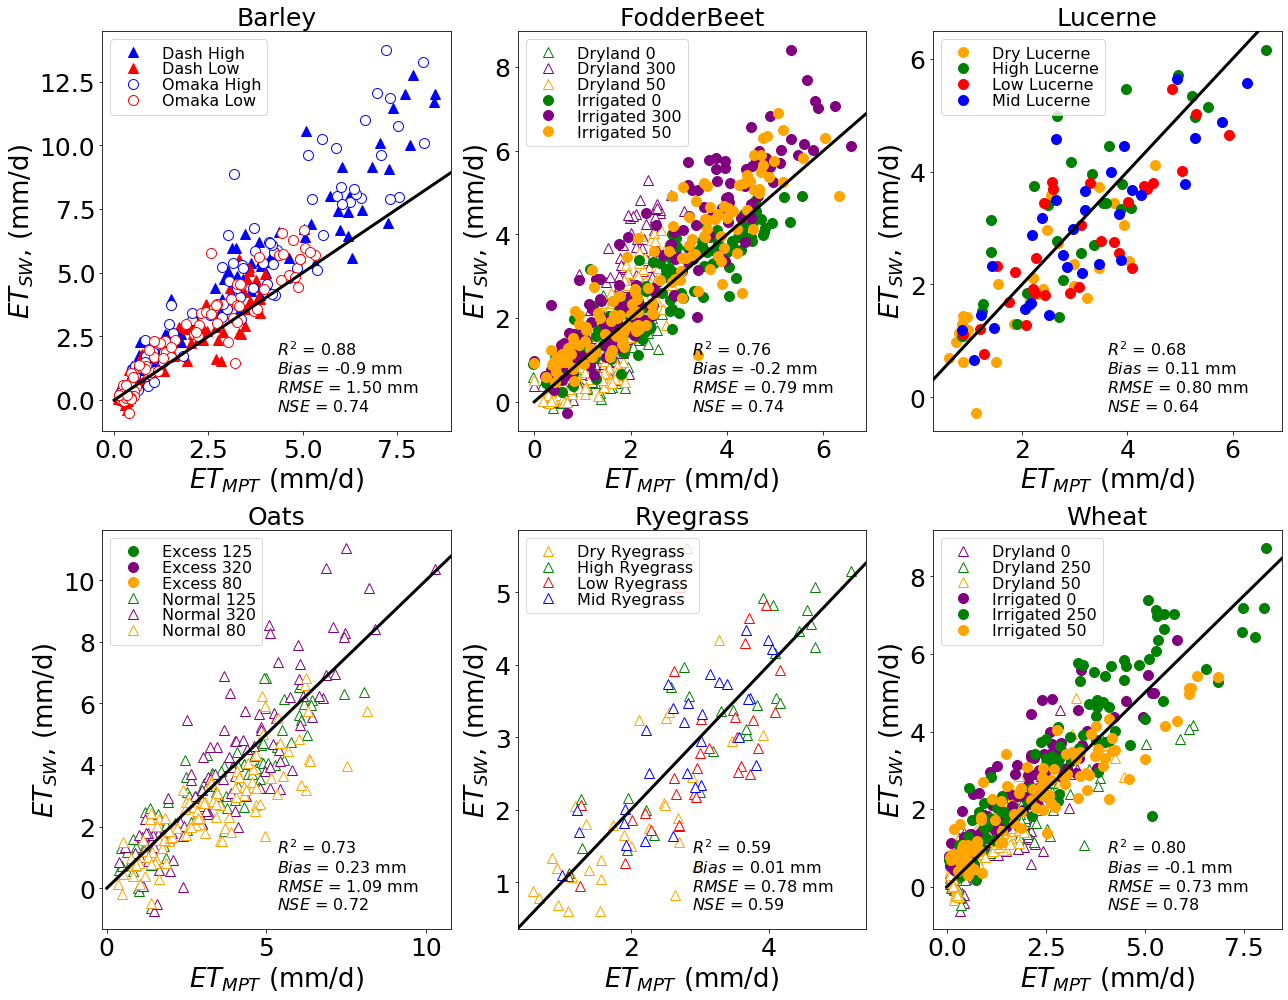

In [33]:
Graph = plt.figure(figsize=(18,14))
ObsPredPlot(BestE)
Graph.savefig('C:\\Users\\cflhxb\\Desktop\\MPT method test paper\Figure7.eps',dpi=400)

## Create range of parameters to sample

In [34]:
problem = {'num_vars': 4,'names': ['p', 'q', 'm','s'],
    'bounds': [[0.7, 2],[0.07, 0.2],[0.5, 3],[0.9,3]]}

# Generate samples
param_values = saltelli.sample(problem, 30,calc_second_order=True)
SampleRange = pd.DataFrame(data=param_values,columns = ['p', 'q', 'm','s'] )
SampleRange

,p,q,m,s
0,0.985645,0.082568,1.796387,2.321191
1,1.064355,0.082568,1.796387,2.321191
2,0.985645,0.187939,1.796387,2.321191
3,0.985645,0.082568,0.614746,2.321191
4,0.985645,0.082568,1.796387,2.788770
...,...,...,...,...
295,1.839404,0.131001,2.666748,2.921045
296,1.261768,0.135190,2.666748,2.921045
297,1.261768,0.131001,1.306885,2.921045
298,1.261768,0.131001,2.666748,1.134814


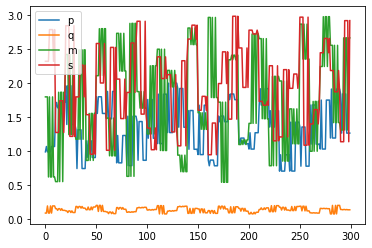

In [35]:
SampleRange.plot()

## Make some graphs of parameter ranges

In [36]:
EBMeans = pd.read_pickle('C:/GitHubRepos/CropWaterAnalysis/General/WaterUseEstimates/barleyData.pkl')
Irrigations = ['Low','Mid','High']
Cultivars = ['Dash','Omaka']
EBMeans.loc[:,'AresidRel'] = EBMeans.loc[:,'AresidRel'] * 0.9 # This is reduced downward because I changed the calculation for upward flux between this paper and the first paper where the model coefficients for barley were fitted.  This changes the fits so to make the fits look correct I adjust this factor

In [37]:
def plotBarley(Xvar,Yvar,CoverThreshold):
    Colors = ['red', 'green', 'blue']
    Markerfills = ['white','white','white','red', 'green', 'blue']
    culpos = 0
    for cul in Cultivars:
        irrpos = 0
        for irr in Irrigations:
            CoverFilter = EBMeans.loc[(cul,irr),'GreenCover'] > CoverThreshold
            Y = EBMeans.loc[(cul,irr),Yvar].loc[CoverFilter] 
            X = EBMeans.loc[(cul,irr),Xvar].loc[CoverFilter]
            plt.plot(X,Y,'o',mec = Colors[irrpos],mfc=Markerfills[culpos],ms=3,mew=1)
            irrpos+=1
            culpos+=1

Text(0.02, 0.95, 'd')

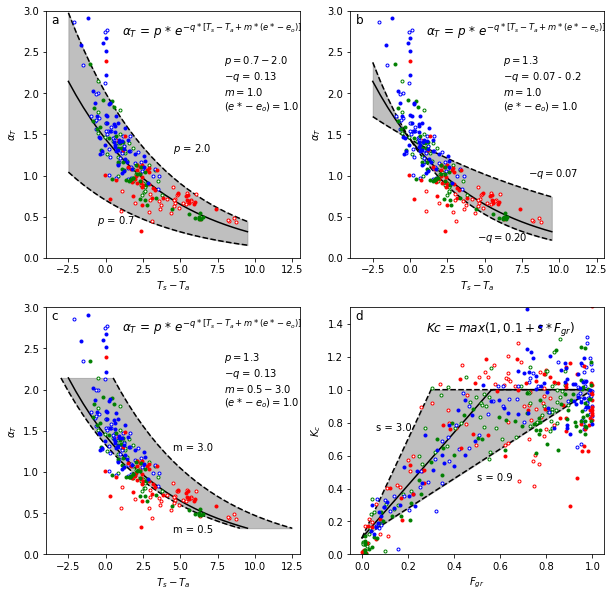

In [39]:
Graph = plt.figure(figsize=(10,10))
xs = np.arange(-2.5,10,0.5)
base, UpperP, LowerP, UpperQ, LowerQ, = [],[],[],[],[]
for x in xs:
    base.append(AlphaCoeff(x,1.0,1.44,0.159,1.6))
    UpperP.append(AlphaCoeff(x,1.0,2,0.159,1.6))
    LowerP.append(AlphaCoeff(x,1.0,0.7,0.159,1.6))
    UpperQ.append(AlphaCoeff(x,1.0,1.44,0.2,1.6))
    LowerQ.append(AlphaCoeff(x,1.0,1.44,0.07,1.6))
ax = Graph.add_subplot(2,2,1)
plt.fill_between(xs,UpperP,LowerP,color='grey',alpha=0.5)
plt.plot(xs,UpperP,'--',label='Max p',color='k')
plt.plot(xs,LowerP,'--',label='Min p',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.3,.90,r'$\alpha_T$ = $p$ * $e^{-q * [T_s - T_a + m * (e*-e_o)]}$' ,transform=ax.transAxes,fontsize=12)
plt.text(.7,.6,'$p = 0.7 - 2.0$ \n$-q$ = 0.13\n$m = 1.0$\n$(e*-e_o) = 1.0$',transform=ax.transAxes)
plt.text(.5,.43,r'$p$ = 2.0',transform=ax.transAxes)
plt.text(.2,.14,r'$p$ = 0.7',transform=ax.transAxes)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha_T$')
plt.xlabel(r'$T_s - T_a$')
plt.text(0.02,0.95,'a',transform = ax.transAxes,fontsize=12)

ax = Graph.add_subplot(2,2,2)
plt.fill_between(xs,UpperQ,LowerQ,color='grey',alpha=0.5)
plt.plot(xs,UpperQ,'--',label='Max q',color='k')
plt.plot(xs,LowerQ,'--',label='Min q',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.3,.90,r'$\alpha_T$ = $p$ * $e^{-q * [T_s - T_a + m * (e*-e_o)]}$' ,transform=ax.transAxes,fontsize=12)
plt.text(.6,.6,'$p = 1.3$ \n$-q$ = 0.07 - 0.2\n$m = 1.0$\n$(e*-e_o) = 1.0$',transform=ax.transAxes)
plt.text(.5,.07,r'$-q = 0.20$',transform=ax.transAxes)
plt.text(.7,.33,r'$-q = 0.07$',transform=ax.transAxes)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha_T$')
plt.xlabel(r'$T_s - T_a$')
plt.text(0.02,0.95,'b',transform = ax.transAxes,fontsize=12)

ax = Graph.add_subplot(2,2,3)
plt.fill_betweenx(base,xs+3,xs-.5,color='grey',alpha=0.5)
plt.plot(xs+3,base,'--',label='Max m',color='k')
plt.plot(xs-.5,base,'--',label='Min m',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.3,.90,r'$\alpha_T$ = $p$ * $e^{-q * [T_s - T_a + m * (e*-e_o)]}$' ,transform=ax.transAxes,fontsize=12)
plt.text(.7,.6,'$p = 1.3$ \n$-q$ = 0.13\n$m = 0.5 - 3.0$\n$(e*-e_o) = 1.0$',transform=ax.transAxes)
plt.text(.5,.09,'m = 0.5',transform=ax.transAxes)
plt.text(.5,.42,'m = 3.0',transform=ax.transAxes)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha_T$')
plt.xlabel(r'$T_s - T_a$')
plt.text(0.02,0.95,'c',transform = ax.transAxes,fontsize=12)

ax = Graph.add_subplot(2,2,4)
xs = np.arange(0,1,0.01)
base, UpperS, LowerS, = [],[],[]
for x in xs:
    base.append(CoverFactor(x,1.6))
    UpperS.append(CoverFactor(x,3))
    LowerS.append(CoverFactor(x,0.9))
plt.fill_between(xs,UpperS,LowerS,color='grey',alpha=0.5)
plt.plot(xs,UpperS,'--', label='Max s',color='k')
plt.plot(xs,LowerS,'--',label='Min s',color='k')
plt.plot(xs,base,color='k')
plotBarley('GreenCover','AresidRel',0.0)
#plt.text(.4,.8,'             p = 1.3 \n            -q = 0.07 - 0.2\n        fPAR = 1.0\nm * eo-e* = 1.0',transform=ax.transAxes)
plt.text(.5,.3,'s = 0.9',transform=ax.transAxes)
plt.text(.1,.5,'s = 3.0',transform=ax.transAxes)
plt.ylim(0,1.5)
plt.ylabel(r'$K_c$')
plt.xlabel(r'$F_{gr}$')
plt.text(.3,.90,r'$Kc$ = $max(1,0.1 + s * F_{gr})$' ,transform=ax.transAxes,fontsize=12)
plt.text(0.02,0.95,'d',transform = ax.transAxes,fontsize=12)

#Graph.savefig('BarleyParamFits.jpg',dpi=400)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

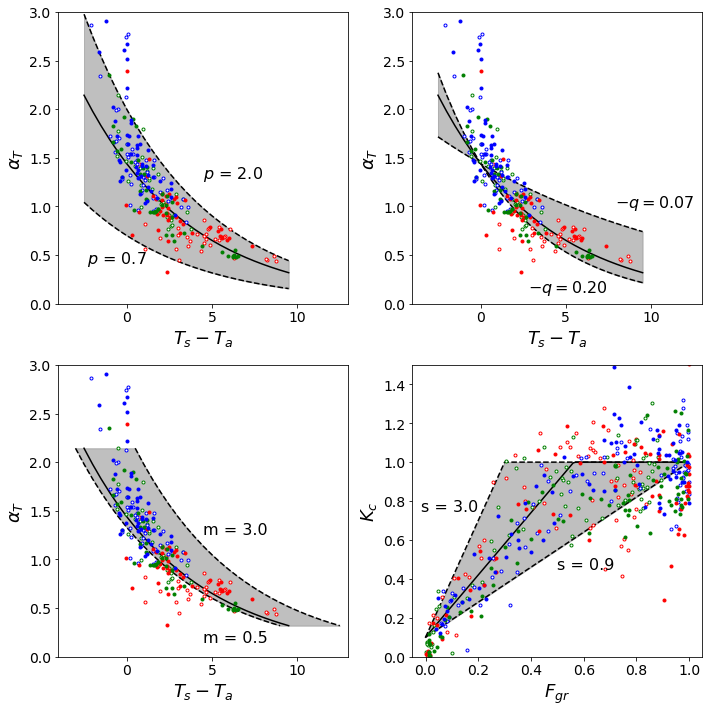

In [40]:
Graph = plt.figure(figsize=(10,10))
xs = np.arange(-2.5,10,0.5)
base, UpperP, LowerP, UpperQ, LowerQ, = [],[],[],[],[]
for x in xs:
    base.append(AlphaCoeff(x,1.0,1.44,0.159,1.6))
    UpperP.append(AlphaCoeff(x,1.0,2,0.159,1.6))
    LowerP.append(AlphaCoeff(x,1.0,0.7,0.159,1.6))
    UpperQ.append(AlphaCoeff(x,1.0,1.44,0.2,1.6))
    LowerQ.append(AlphaCoeff(x,1.0,1.44,0.07,1.6))
ax = Graph.add_subplot(2,2,1)
plt.fill_between(xs,UpperP,LowerP,color='grey',alpha=0.5)
plt.plot(xs,UpperP,'--',label='Max p',color='k')
plt.plot(xs,LowerP,'--',label='Min p',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.5,.43,r'$p$ = 2.0',transform=ax.transAxes,fontsize=16)
plt.text(.1,.14,r'$p$ = 0.7',transform=ax.transAxes,fontsize=16)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha_T$',fontsize=18)
plt.xlabel(r'$T_s - T_a$',fontsize=18)
plt.tick_params(labelsize =14)


ax = Graph.add_subplot(2,2,2)
plt.fill_between(xs,UpperQ,LowerQ,color='grey',alpha=0.5)
plt.plot(xs,UpperQ,'--',label='Max q',color='k')
plt.plot(xs,LowerQ,'--',label='Min q',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.4,.04,r'$-q = 0.20$',transform=ax.transAxes,fontsize=16)
plt.text(.7,.33,r'$-q = 0.07$',transform=ax.transAxes,fontsize=16)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha_T$',fontsize=18)
plt.xlabel(r'$T_s - T_a$',fontsize=18)
plt.tick_params(labelsize =14)

ax = Graph.add_subplot(2,2,3)
plt.fill_betweenx(base,xs+3,xs-.5,color='grey',alpha=0.5)
plt.plot(xs+3,base,'--',label='Max m',color='k')
plt.plot(xs-.5,base,'--',label='Min m',color='k')
plt.plot(xs,base,color='k')
plotBarley('To-Ta','A',0.6)
plt.text(.5,.05,'m = 0.5',transform=ax.transAxes,fontsize=16)
plt.text(.5,.42,'m = 3.0',transform=ax.transAxes,fontsize=16)
plt.ylim(0,3)
plt.xlim(-4,13)
plt.ylabel(r'$\alpha_T$',fontsize=18)
plt.xlabel(r'$T_s - T_a$',fontsize=18)
plt.tick_params(labelsize =14)

ax = Graph.add_subplot(2,2,4)
xs = np.arange(0,1,0.01)
base, UpperS, LowerS, = [],[],[]
for x in xs:
    base.append(CoverFactor(x,1.6))
    UpperS.append(CoverFactor(x,3))
    LowerS.append(CoverFactor(x,0.9))
plt.fill_between(xs,UpperS,LowerS,color='grey',alpha=0.5)
plt.plot(xs,UpperS,'--', label='Max s',color='k')
plt.plot(xs,LowerS,'--',label='Min s',color='k')
plt.plot(xs,base,color='k')
plotBarley('GreenCover','AresidRel',0.0)
#plt.text(.4,.8,'             p = 1.3 \n            -q = 0.07 - 0.2\n        fPAR = 1.0\nm * eo-e* = 1.0',transform=ax.transAxes)
plt.text(.5,.3,'s = 0.9',transform=ax.transAxes,fontsize=16)
plt.text(.03,.5,'s = 3.0',transform=ax.transAxes,fontsize=16)
plt.ylim(0,1.5)
plt.ylabel(r'$K_c$',fontsize=18)
plt.xlabel(r'$F_{gr}$',fontsize=18)
plt.tick_params(labelsize =14)
#plt.text(0.02,0.95,'d',transform = ax.transAxes,fontsize=12)

plt.tight_layout()
Graph.savefig('C:\\Users\\cflhxb\\Desktop\\MPT method test paper\\Figure2.eps',dpi=400)

## Calculate Fits

In [ ]:
Danger, running the cells below will recalculate all parameter combinations

In [ ]:
OptFits = pd.DataFrame(index = pd.MultiIndex.from_product([[],[],[],[],[]],
                                                          names = ['Crop','p','q','m','s']))
for comb in SampleRange.index:
    comb = SampleRange.loc[comb,:].values
    Eest = CalcE(comb[0],comb[1],comb[2],comb[3])
    CalcFits(comb[0],comb[1],comb[2],comb[3],Eest,OptFits)

In [ ]:
OptFits.NSE.plot()

In [ ]:
OptFits.loc[:,'Crop'] = OptFits.index.get_level_values(0)
OptFits.loc[:,'p'] = OptFits.index.get_level_values(1)
OptFits.loc[:,'q'] = OptFits.index.get_level_values(2)
OptFits.loc[:,'m'] = OptFits.index.get_level_values(3)
OptFits.loc[:,'s'] = OptFits.index.get_level_values(4)

In [ ]:
OptFits.to_pickle('next.pkl')